In [2]:
import keras
from keras import layers

def self_attention(inputs, att_dim):
    query = layers.Dense(att_dim)(inputs)
    key = layers.Dense(att_dim)(inputs)
    value = layers.Dense(att_dim)(inputs)

    key_t = keras.ops.transpose(key, axes=(0, 2, 1))
    query_key_dot = keras.ops.matmul(query, key_t) / keras.ops.sqrt(att_dim)
    score = keras.activations.softmax(query_key_dot)

    return keras.ops.matmul(score, value)


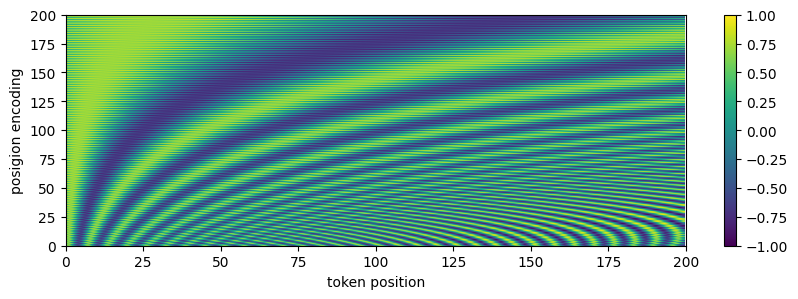

In [4]:
import numpy as np
import matplotlib.pyplot as plt

d = 500
n_token = 200
pos_encoding = np.zeros((d, n_token))

for pos in range(n_token):
    for i in range(0, d, 2):
        pos_encoding[i, pos] = np.sin(pos / 10000 ** (i / d))
        pos_encoding[i + 1, pos] = np.cos(pos / 10000 ** (i / d))

plt.figure(figsize=(10, 3))
plt.imshow(pos_encoding, interpolation='quadric', aspect='auto')
plt.axis([0, n_token, 0, 200])
plt.xlabel('token position')
plt.ylabel('posigion encoding')
plt.colorbar()
plt.show()


In [ ]:
def transformer_encoder(x, padding_mask, dropout, activation='relu'):
    # 입력값을 residual에 저장 (잔차 연결용)
    residual = x 
    # key_dim은 head별 차원 수
    key_dim = hidden_dim // num_heads

    # Multi-Head Attention 레이어 적용
    x = layers.MultiHeadAttention(num_heads, key_dim, dropout=dropout)(
        query=x,
        value=x,
        attention_mask=padding_mask,
    )
    # 드롭아웃 적용
    x = layers.Dropout(dropout)(x)
    # 잔차 연결 (residual connection)
    x = x + residual
    # Layer Normalization
    x = layers.LayerNormalization()(x)
    # 다음 잔차 연결을 위해 residual 갱신
    residual = x

    # Position-wise Feedforward Network (첫 번째 Dense)
    x = layers.Dense(hidden_dim*4, activation=activation)(x)
    # 두 번째 Dense (차원 복원)
    x = layers.Dense(hidden_dim)(x)
    # 드롭아웃 적용
    x = layers.Dropout(dropout)(x)
    # 잔차 연결
    x = x + residual
    # Layer Normalization
    x = layers.LayerNormalization()(x)
    
    return x


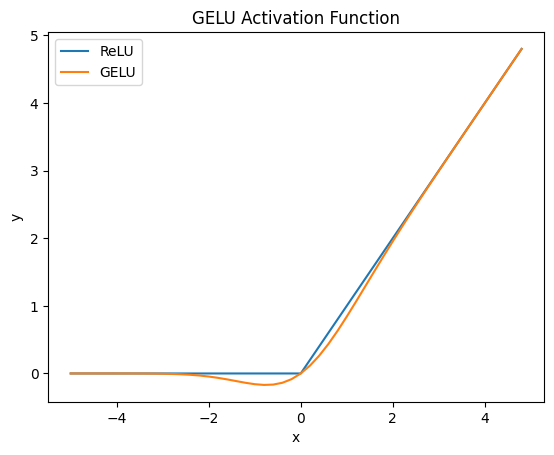

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import erf

def gelu(x):
    cdf = 0.5 * (1.0 + erf(x / np.sqrt(2.0)))
    return x * cdf

x = np.arange(-5, 5, 0.2)

plt.plot(x, x.clip(0), label='ReLU')
plt.plot(x, gelu(x), label='GELU')
plt.xlabel('x')
plt.ylabel('y')
plt.title('GELU Activation Function')
plt.legend()
plt.show()
